Mapa de calor para mostrar em quais regiões ocorrem o maior fluxo de compras.
Quais as regiões em que os usuários possuem maior satisfação.

In [3]:
# Uploading files from your local file system

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
 

Saving brazilian-ecommerce.zip to brazilian-ecommerce.zip
User uploaded file "brazilian-ecommerce.zip" with length 26382433 bytes


In [4]:
# unzip files
!unzip brazilian-ecommerce.zip

Archive:  brazilian-ecommerce.zip
  inflating: geolocation_olist_public_dataset.csv  
  inflating: olist_public_dataset_v2_customers.csv  
  inflating: product_category_name_translation.csv  
  inflating: olist_public_dataset_v2.csv  
  inflating: olist_classified_public_dataset.csv  
  inflating: olist_public_dataset_v2_payments.csv  


In [2]:
#import pandas
import pandas as pd

In [3]:
# getting each data
coordenadas = pd.read_csv("geolocation_olist_public_dataset.csv")
classificacoes = pd.read_csv("olist_classified_public_dataset.csv")
informacoes_dos_pedidos = pd.read_csv("olist_public_dataset_v2.csv", index_col=0)
chaves_clientes = pd.read_csv("olist_public_dataset_v2_customers.csv")
tipo_pagamento = pd.read_csv("olist_public_dataset_v2_payments.csv", index_col=0)
categoria_en_pt = pd.read_csv("product_category_name_translation.csv")


In [22]:
# print each data in 2 lines
print(coordenadas.head(2))
print(classificacoes.head(2))
print(informacoes_dos_pedidos.head(2))
print(chaves_clientes.head(2))
print(tipo_pagamento.head(2))



   zip_code_prefix       city state        lat        lng
0               10  sao paulo    sp -23.547807 -46.636122
1               10  sao paulo    sp -23.546081 -46.644820
   Unnamed: 0  id order_status  order_products_value  order_freight_value  \
0           0   1    delivered                 89.99                14.38   
1           1   2    delivered                 69.00                15.23   

   order_items_qty  order_sellers_qty    order_purchase_timestamp  \
0                1                  1  2017-08-30 11:41:01.000000   
1                1                  1  2017-09-26 09:13:36.000000   

             order_aproved_at order_estimated_delivery_date  \
0  2017-08-30 11:55:08.970352    2017-09-21 00:00:00.000000   
1  2017-09-26 09:28:10.922048    2017-10-24 00:00:00.000000   

           ...           votes_delayed votes_low_quality votes_return  \
0          ...                       0                 0            0   
1          ...                       0            

In [23]:
# creating a pedidos data
pedidos = pd.concat([informacoes_dos_pedidos, tipo_pagamento])

In [24]:
# changing the index
pedidos = pedidos.set_index("customer_state")

In [25]:
# changing look of the state column
coordenadas["state"] = coordenadas["state"].str.upper()
coordenadas.head(4)

,zip_code_prefix,city,state,lat,lng
0,10,sao paulo,SP,-23.547807,-46.636122
1,10,sao paulo,SP,-23.546081,-46.644820
2,10,sao paulo,SP,-23.540984,-46.642569
3,10,sao paulo,SP,-23.546758,-46.645771


In [36]:
# counting each state
estados_v_c = coordenadas["state"].value_counts().reset_index()
estados_v_c

,index,state
0,SP,81929
1,MG,39851
2,RS,34831
3,PR,31441
4,RJ,29057
5,BA,20463
6,GO,11497
7,PE,11460
8,SC,9342
9,CE,7690


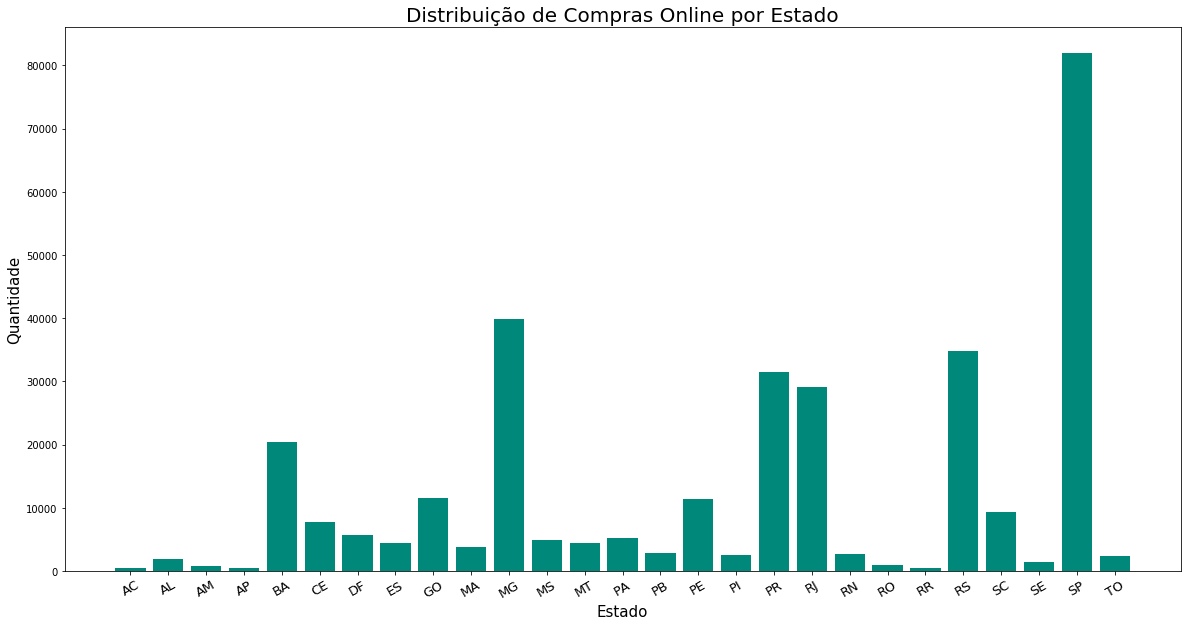

In [67]:
# creating a data visualization
import matplotlib.pyplot as plt
fig, axis = plt.subplots(figsize=(20,10))
plt.bar(estados_v_c['index'], estados_v_c['state'], color="#00897B")
plt.title("Distribuição de Compras Online por Estado", fontsize=20)
plt.xticks( fontsize=13,rotation=30)
plt.xlabel("Estado", fontsize=15)
plt.ylabel("Quantidade", fontsize=15)
plt.savefig("distribuicao.png")
plt.show()


In [6]:
# reindex the data
coordenadas = coordenadas.set_index("state")

In [4]:
#updating the files
from folium.plugins import HeatMap
from folium import plugins
import numpy as np

In [32]:
# cleaning the data
clean_coorden  = coordenadas.dropna(axis=1)
print(clean_coorden.shape)

# lat and lng sample
data = np.array(
    [
        clean_coorden['lat'],
        clean_coorden['lng']
    ]
).T.data.tolist()

# Create a map
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=4,
    tiles='stamenterrain',
    width='100%',
    height='100%'
)

# data : list of points of the form [lat, lng] or [lat, lng, weight]
HeatMap(data).add_to(m)

# saving the heatmap
m.save('heat_map_brazilian_e_commerce.html')



(323016, 4)
